## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [3]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [15]:
app_train["DAYS_BIRTH_hi"] = pd.cut(app_train["DAYS_BIRTH"]/365, 10)
app_train["DAYS_BIRTH_hi"].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: DAYS_BIRTH_hi, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

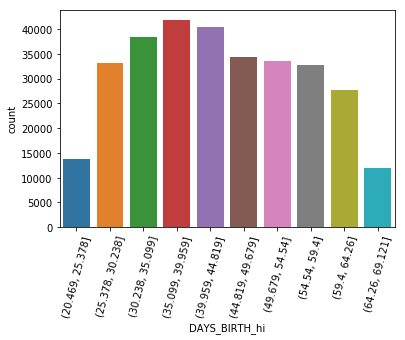

In [20]:
import seaborn as sns
px = app_train["DAYS_BIRTH_hi"]
sns.countplot(px)
plt.xticks(rotation = 75)

In [22]:
app_train["DAYS_BIRTH_hi"] = pd.cut(app_train["DAYS_BIRTH"]/365, np.linspace(20, 70, 11))
app_train["DAYS_BIRTH_hi"].value_counts()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: DAYS_BIRTH_hi, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

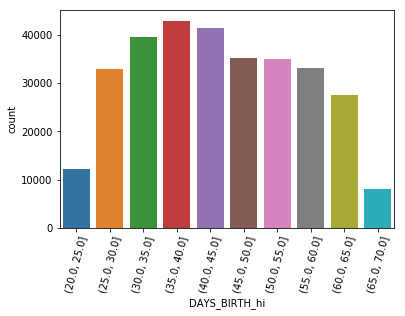

In [23]:
import seaborn as sns
px = app_train["DAYS_BIRTH_hi"]
sns.countplot(px)
plt.xticks(rotation = 75)

In [88]:
app_train["DAYS_BIRTH_hi"] = pd.qcut(app_train["DAYS_BIRTH"]/365, 10)
hello_world = app_train["DAYS_BIRTH_hi"].value_counts().sort_index() 
print(hello_world.keys())
for key in hello_world.keys():
     #print('%0.2f' %(key.right-key.left))
     #print(f'{(key.right-key.left):.2f}')
     #print('%f  %f' % (key.right, key.left))
     print(f'{key.right:.2f} {key.left:.2f}')

CategoricalIndex([(20.517, 28.175], (28.175, 32.038],   (32.038, 36.0],
                    (36.0, 39.496], (39.496, 43.151], (43.151, 47.178],
                   (47.178, 51.74],  (51.74, 56.093],  (56.093, 60.77],
                   (60.77, 69.121]],
                 categories=[(20.517, 28.175], (28.175, 32.038], (32.038, 36.0], (36.0, 39.496], (39.496, 43.151], (43.151, 47.178], (47.178, 51.74], (51.74, 56.093], ...], ordered=True, dtype='category')
28.18 20.52
32.04 28.18
36.00 32.04
39.50 36.00
43.15 39.50
47.18 43.15
51.74 47.18
56.09 51.74
60.77 56.09
69.12 60.77


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

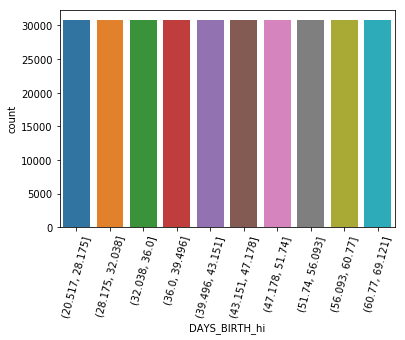

In [25]:
import seaborn as sns
px = app_train["DAYS_BIRTH_hi"]
sns.countplot(px)
plt.xticks(rotation = 75)

In [66]:
len((20.517, 28.175))

2